# AEP Power Consumption Analysis

### Sort datetime in ascending order

In [1]:
import pandas as pd

# Load the CSV file (update the filename as needed)
input_file = "AEP_hourly.csv"
output_file = "AEP_hourly_sorted.csv"

# Read the CSV with parsing datetime
df = pd.read_csv(input_file, parse_dates=['Datetime'])

# Sort by the Datetime column
df_sorted = df.sort_values(by='Datetime')

# Save the sorted data to a new CSV file
df_sorted.to_csv(output_file, index=False)

print(f"Sorted data saved to: {output_file}")

Sorted data saved to: AEP_hourly_sorted.csv


### Plot power consumption versus datetime

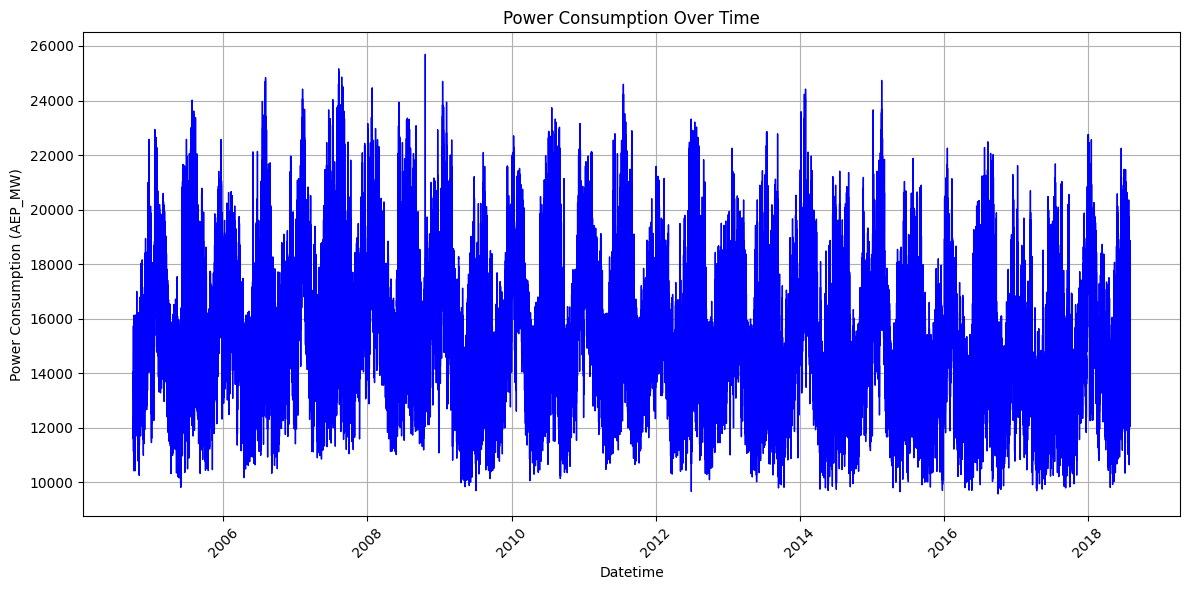

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and parse the data
input_file = "AEP_hourly_sorted.csv"
df = pd.read_csv(input_file, parse_dates=['Datetime'])

# Sort by datetime
df_sorted = df.sort_values(by='Datetime')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Datetime'], df_sorted['AEP_MW'], color='blue', linewidth=1)

# Labels and title
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (AEP_MW)')
plt.title('Power Consumption Over Time')
plt.grid(True)

# Improve x-axis formatting
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Add new time-based features to the dataframe

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
input_file = "AEP_hourly_sorted.csv"
output_file = "AEP_hourly_new_features.csv"

# Load and parse the data
df = pd.read_csv(input_file, parse_dates=['Datetime'])

# Sort by datetime
df = df.sort_values(by='Datetime')

# Add time-based features
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek        # Monday = 0, Sunday = 6
df['Month'] = df['Datetime'].dt.month
df['DayOfMonth'] = df['Datetime'].dt.day
df['Weekend'] = df['DayOfWeek'] >= 5                 # True for Saturday/Sunday

# Save enriched data
df.to_csv(output_file, index=False)
print(f"Enriched data saved to: {output_file}")

Enriched data saved to: AEP_hourly_new_features.csv


### Box plots

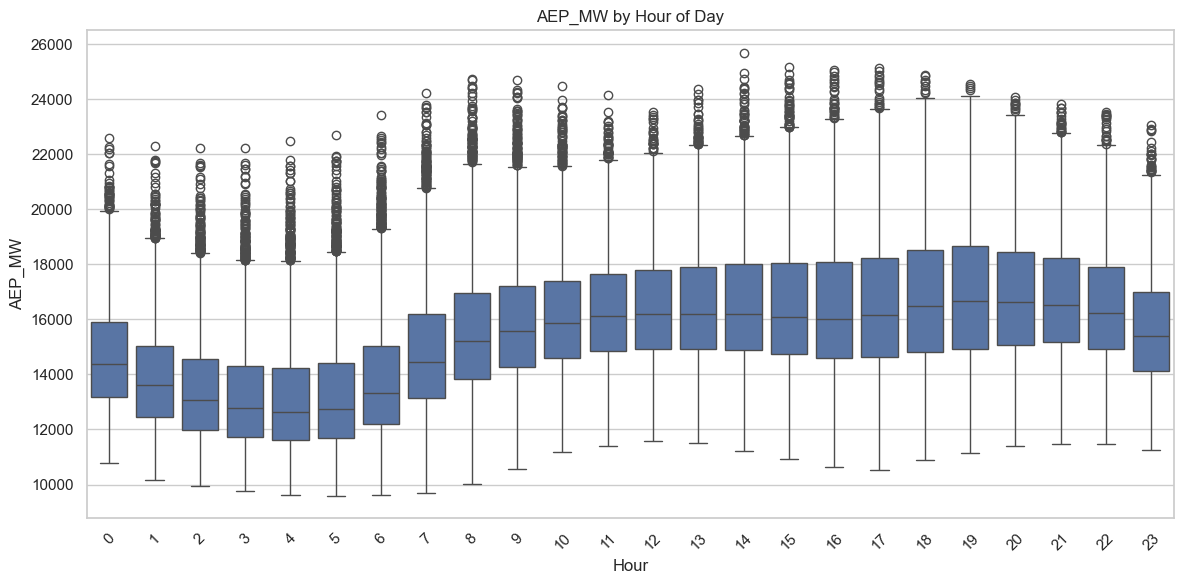

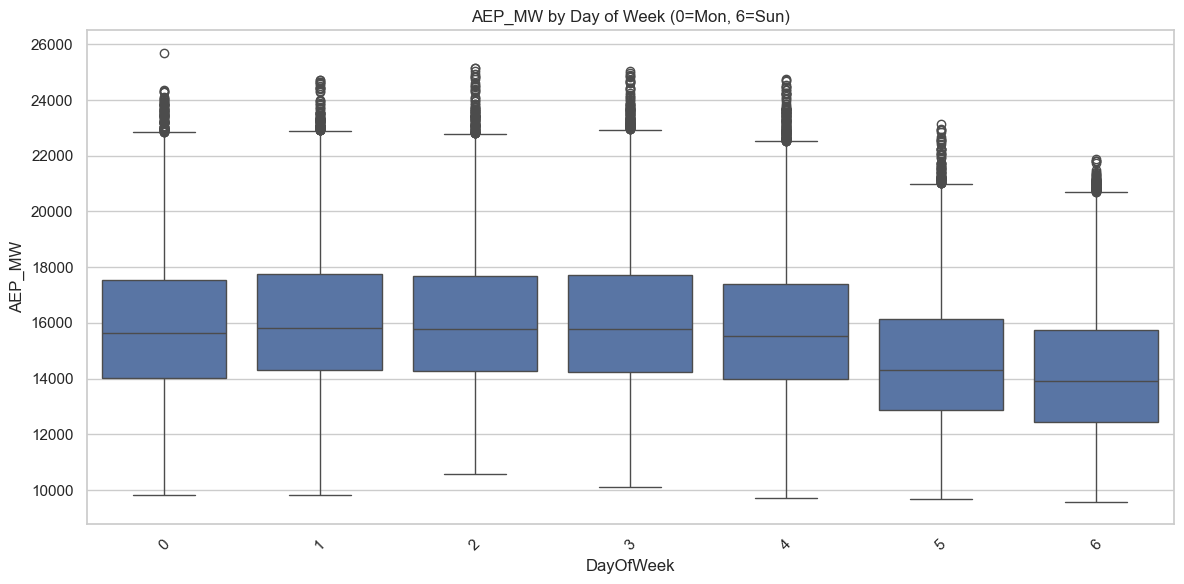

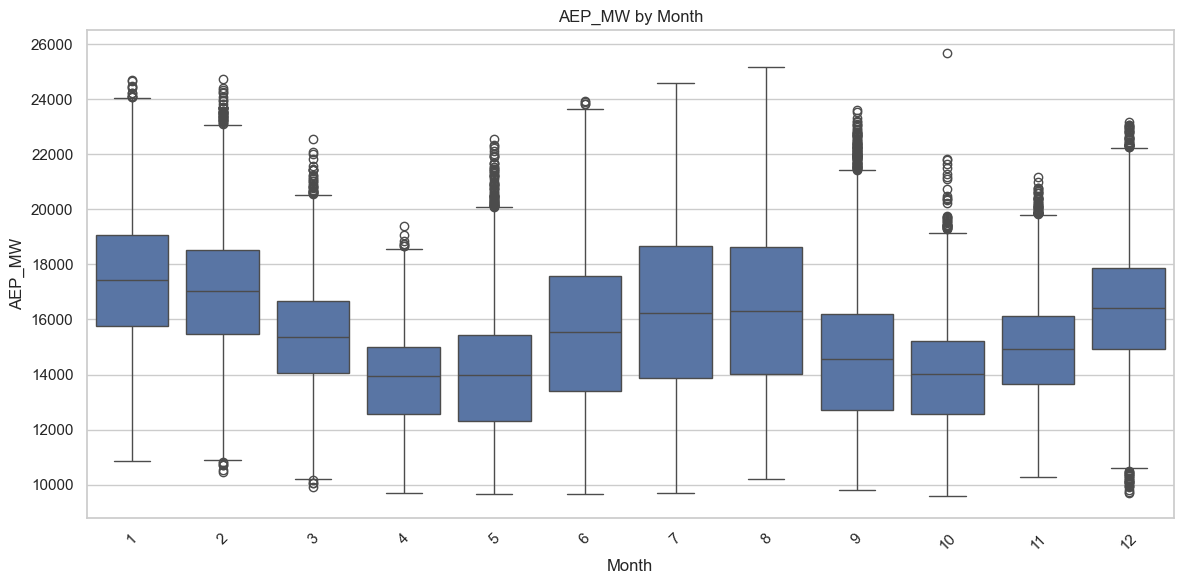

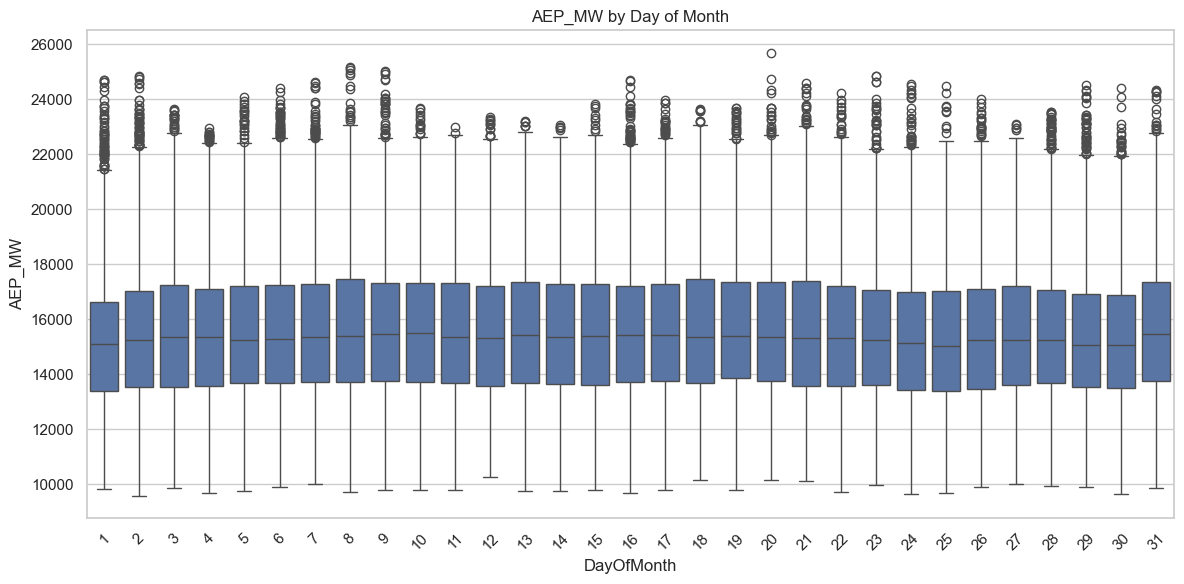

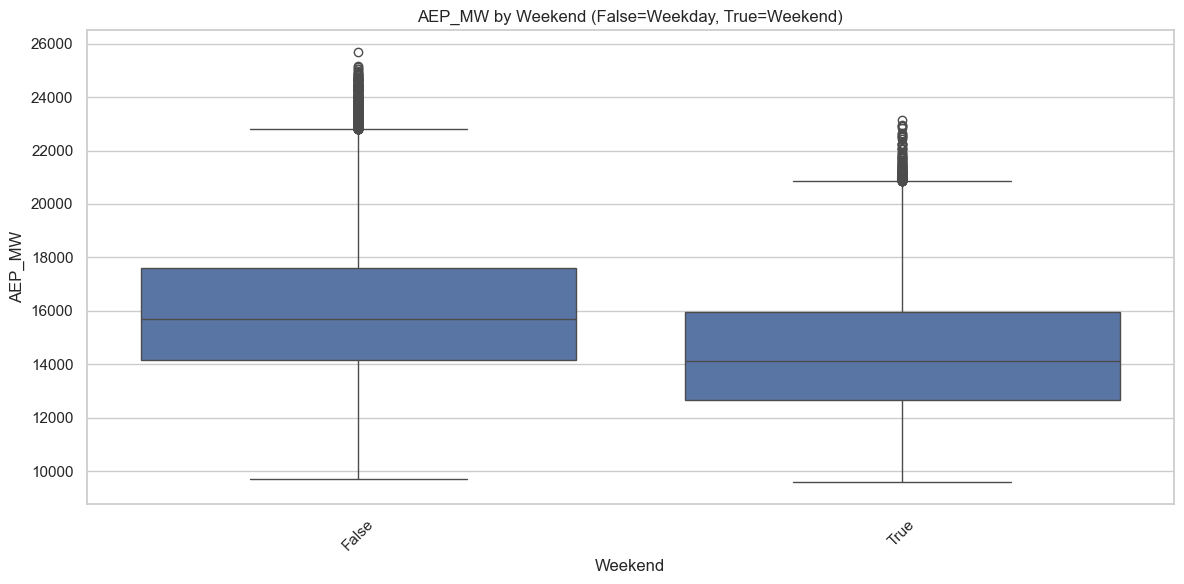

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
input_file = "AEP_hourly_new_features.csv"

# Load and parse data
df = pd.read_csv(input_file, parse_dates=['Datetime'])
df = df.sort_values(by='Datetime')

# Create time-based features
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['DayOfMonth'] = df['Datetime'].dt.day
df['Weekend'] = df['DayOfWeek'] >= 5  # True for Saturday/Sunday

# Set seaborn style
sns.set(style="whitegrid")

# Function to create box plot
def plot_box(data, x, y='AEP_MW', title=""):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each feature
plot_box(df, 'Hour', title='AEP_MW by Hour of Day')
plot_box(df, 'DayOfWeek', title='AEP_MW by Day of Week (0=Mon, 6=Sun)')
plot_box(df, 'Month', title='AEP_MW by Month')
plot_box(df, 'DayOfMonth', title='AEP_MW by Day of Month')
plot_box(df, 'Weekend', title='AEP_MW by Weekend (False=Weekday, True=Weekend)')

### Grouped average plots

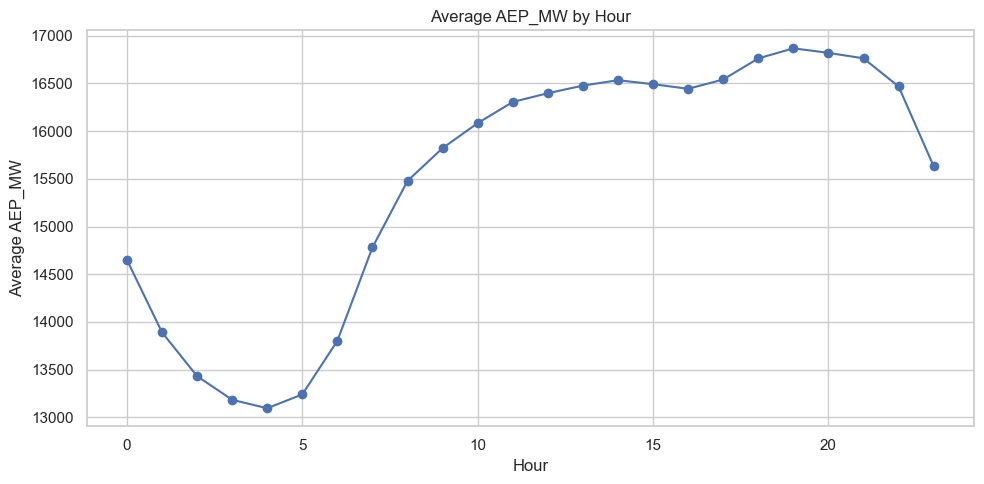

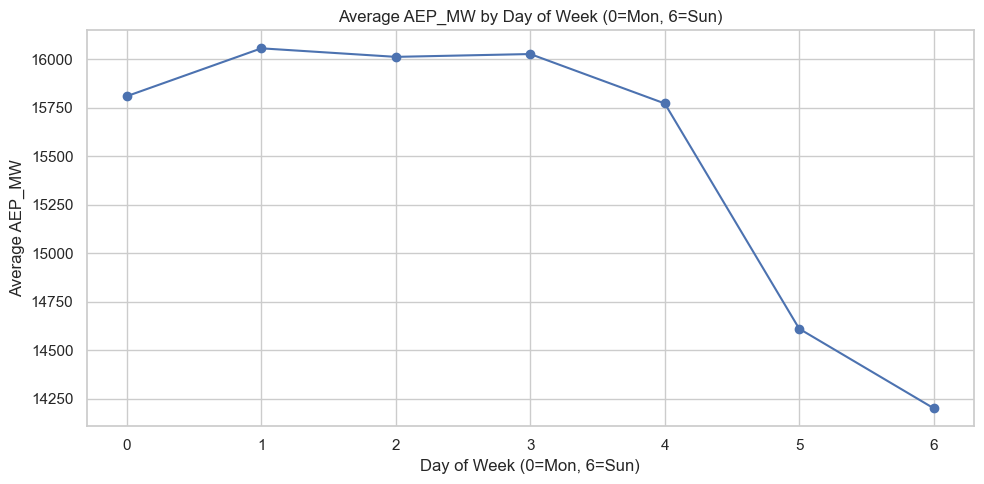

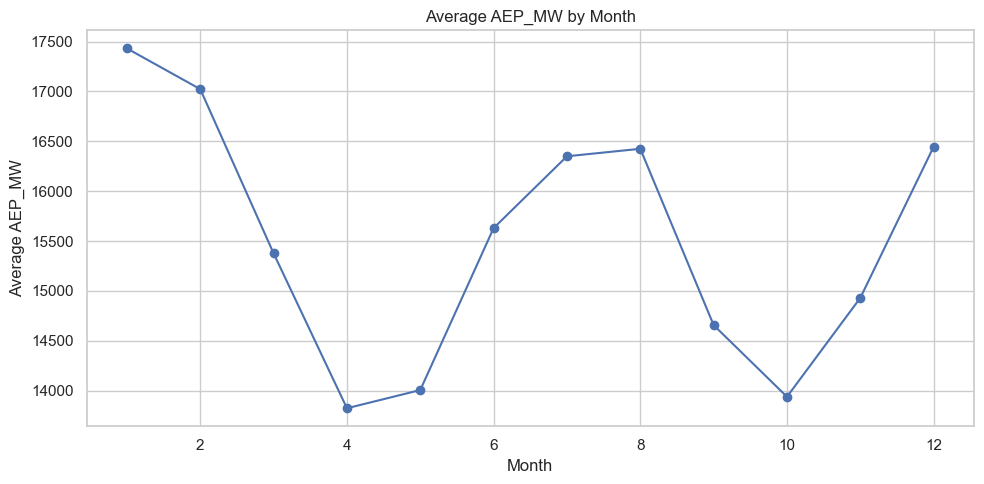

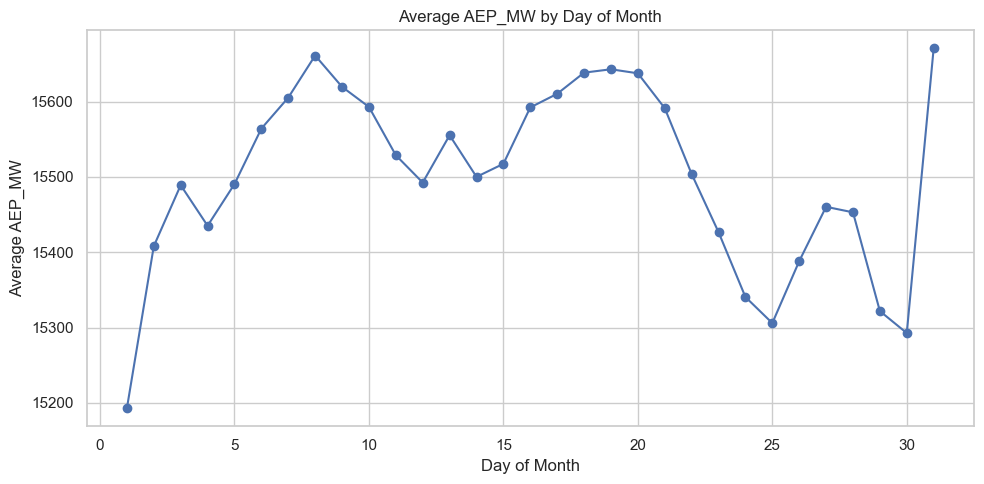

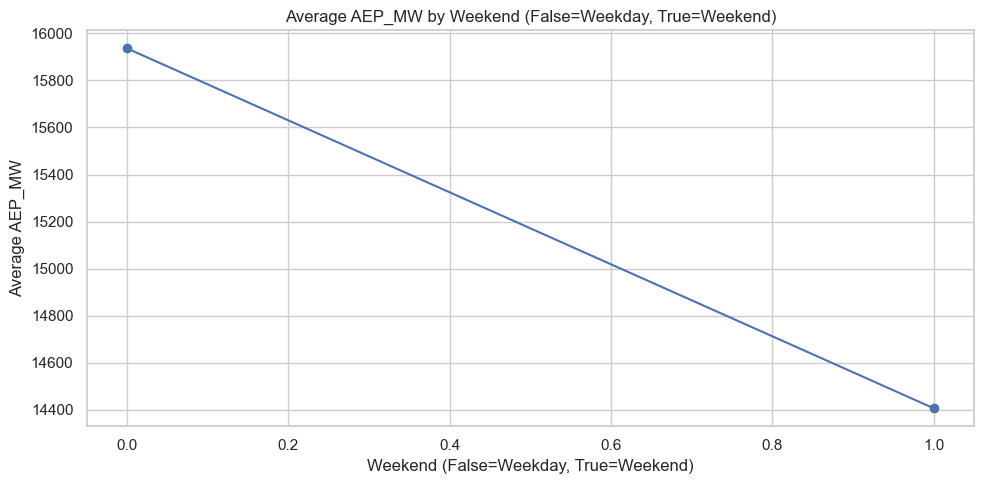

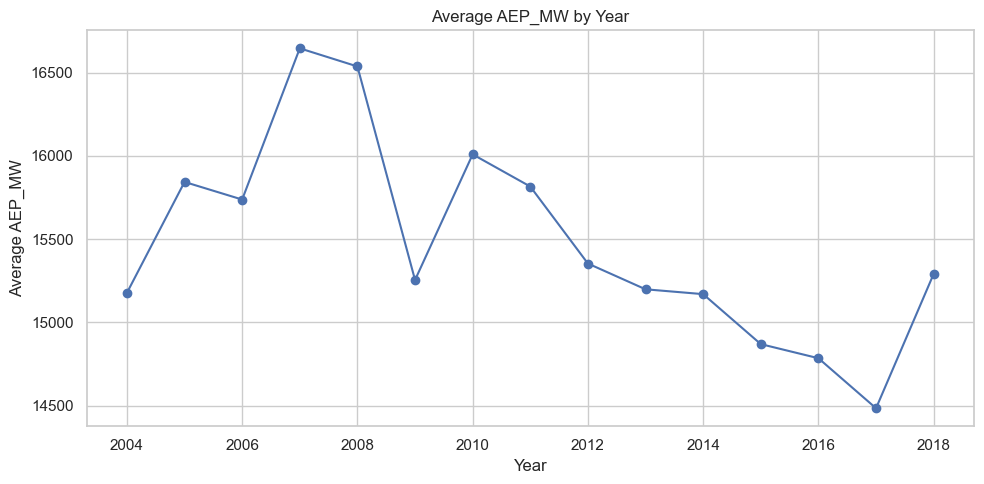

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and parse data
input_file = "AEP_hourly_new_features.csv"
df = pd.read_csv(input_file, parse_dates=['Datetime'])
df = df.sort_values(by='Datetime')

# Add time-based features
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['DayOfMonth'] = df['Datetime'].dt.day
df['Weekend'] = df['DayOfWeek'] >= 5
df['Year'] = df['Datetime'].dt.year

# Plotting function
def plot_grouped_average(df, group_col, title):
    avg = df.groupby(group_col)['AEP_MW'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(avg[group_col], avg['AEP_MW'], marker='o')
    plt.title(f'Average AEP_MW by {title}')
    plt.xlabel(title)
    plt.ylabel('Average AEP_MW')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Generate plots
plot_grouped_average(df, 'Hour', 'Hour')
plot_grouped_average(df, 'DayOfWeek', 'Day of Week (0=Mon, 6=Sun)')
plot_grouped_average(df, 'Month', 'Month')
plot_grouped_average(df, 'DayOfMonth', 'Day of Month')
plot_grouped_average(df, 'Weekend', 'Weekend (False=Weekday, True=Weekend)')
plot_grouped_average(df, 'Year', 'Year')

### Heat maps

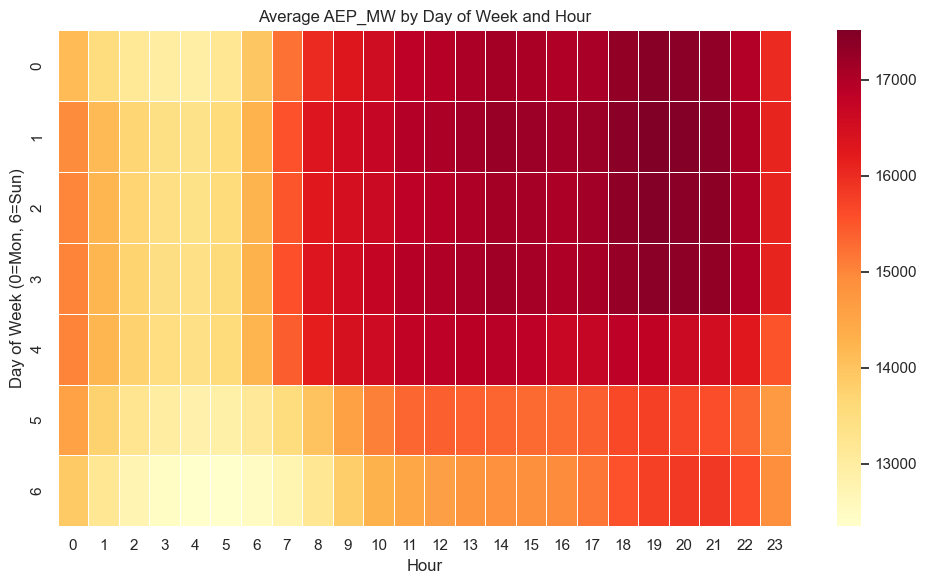

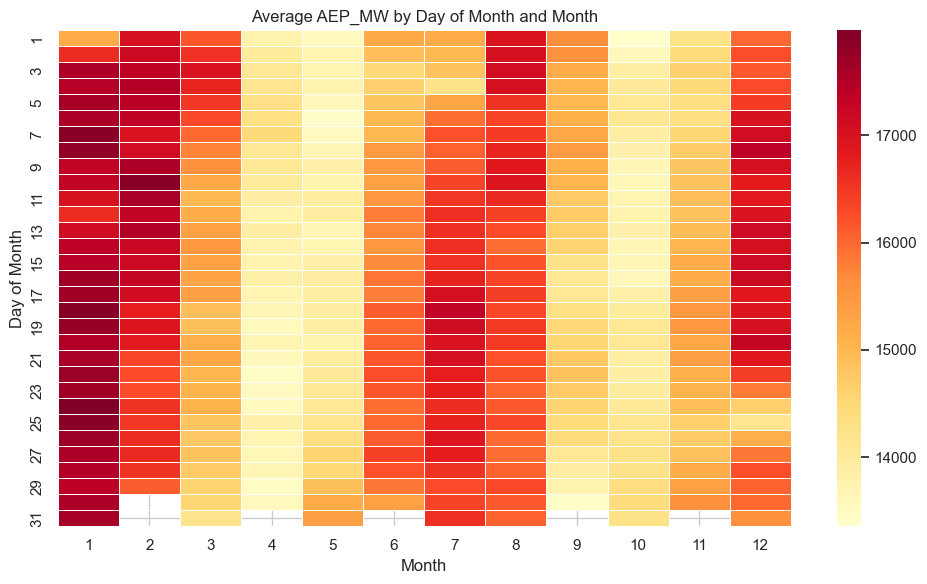

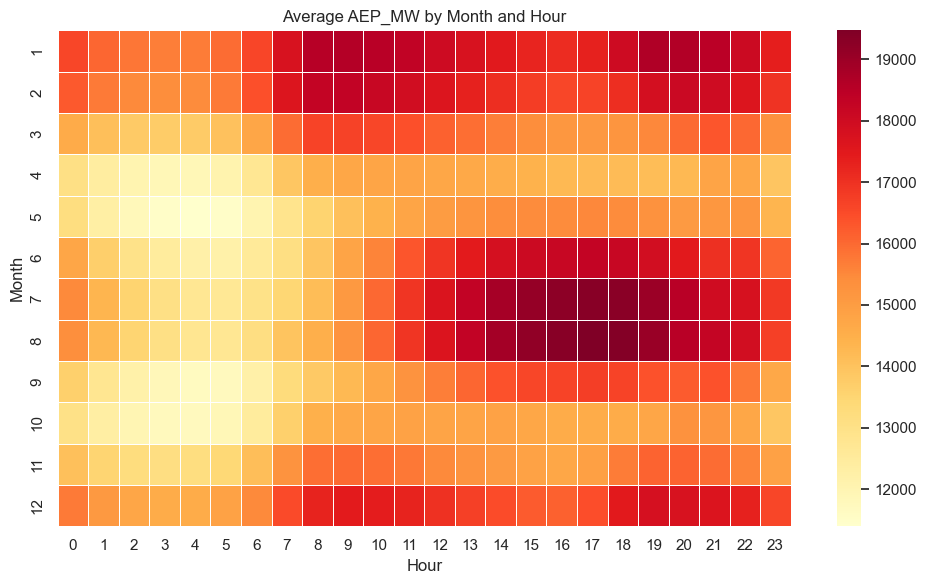

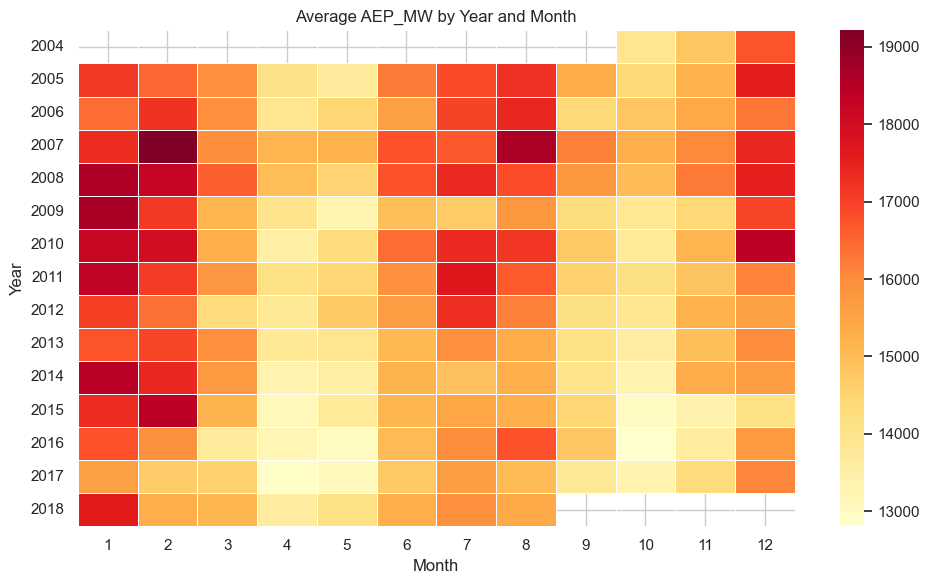

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and parse the data
input_file = "AEP_hourly_new_features.csv"
df = pd.read_csv(input_file, parse_dates=['Datetime'])
df = df.sort_values(by='Datetime')

# Create time-based features
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek
df['Month'] = df['Datetime'].dt.month
df['DayOfMonth'] = df['Datetime'].dt.day
df['Year'] = df['Datetime'].dt.year

# Function to create heatmap
def plot_heatmap(pivot_table, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, fmt=".0f", linewidths=.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# 1. Hour vs DayOfWeek
pivot1 = df.pivot_table(index='DayOfWeek', columns='Hour', values='AEP_MW', aggfunc='mean')
plot_heatmap(pivot1, 'Average AEP_MW by Day of Week and Hour', 'Hour', 'Day of Week (0=Mon, 6=Sun)')

# 2. Month vs DayOfMonth
pivot2 = df.pivot_table(index='DayOfMonth', columns='Month', values='AEP_MW', aggfunc='mean')
plot_heatmap(pivot2, 'Average AEP_MW by Day of Month and Month', 'Month', 'Day of Month')

# 3. Month vs Hour
pivot3 = df.pivot_table(index='Month', columns='Hour', values='AEP_MW', aggfunc='mean')
plot_heatmap(pivot3, 'Average AEP_MW by Month and Hour', 'Hour', 'Month')

# 4. Year vs Month
pivot4 = df.pivot_table(index='Year', columns='Month', values='AEP_MW', aggfunc='mean')
plot_heatmap(pivot4, 'Average AEP_MW by Year and Month', 'Month', 'Year')

### Single input feature to forecast power consumption for next 30 days

Epoch 1/50, Loss: 0.018459
Epoch 2/50, Loss: 0.013408
Epoch 3/50, Loss: 0.012228
Epoch 4/50, Loss: 0.011117
Epoch 5/50, Loss: 0.009536
Epoch 6/50, Loss: 0.009072
Epoch 7/50, Loss: 0.008211
Epoch 8/50, Loss: 0.009242
Epoch 9/50, Loss: 0.008438
Epoch 10/50, Loss: 0.007696
Epoch 11/50, Loss: 0.007626
Epoch 12/50, Loss: 0.007100
Epoch 13/50, Loss: 0.007243
Epoch 14/50, Loss: 0.006863
Epoch 15/50, Loss: 0.010847
Epoch 16/50, Loss: 0.007666
Epoch 17/50, Loss: 0.006603
Epoch 18/50, Loss: 0.008667
Epoch 19/50, Loss: 0.009067
Epoch 20/50, Loss: 0.007605
Epoch 21/50, Loss: 0.006685
Epoch 22/50, Loss: 0.006239
Epoch 23/50, Loss: 0.005910
Epoch 24/50, Loss: 0.005654
Epoch 25/50, Loss: 0.005394
Epoch 26/50, Loss: 0.005175
Epoch 27/50, Loss: 0.004916
Epoch 28/50, Loss: 0.004711
Epoch 29/50, Loss: 0.004510
Epoch 30/50, Loss: 0.004304
Epoch 31/50, Loss: 0.004115
Epoch 32/50, Loss: 0.003946
Epoch 33/50, Loss: 0.003815
Epoch 34/50, Loss: 0.003694
Epoch 35/50, Loss: 0.003534
Epoch 36/50, Loss: 0.003437
E

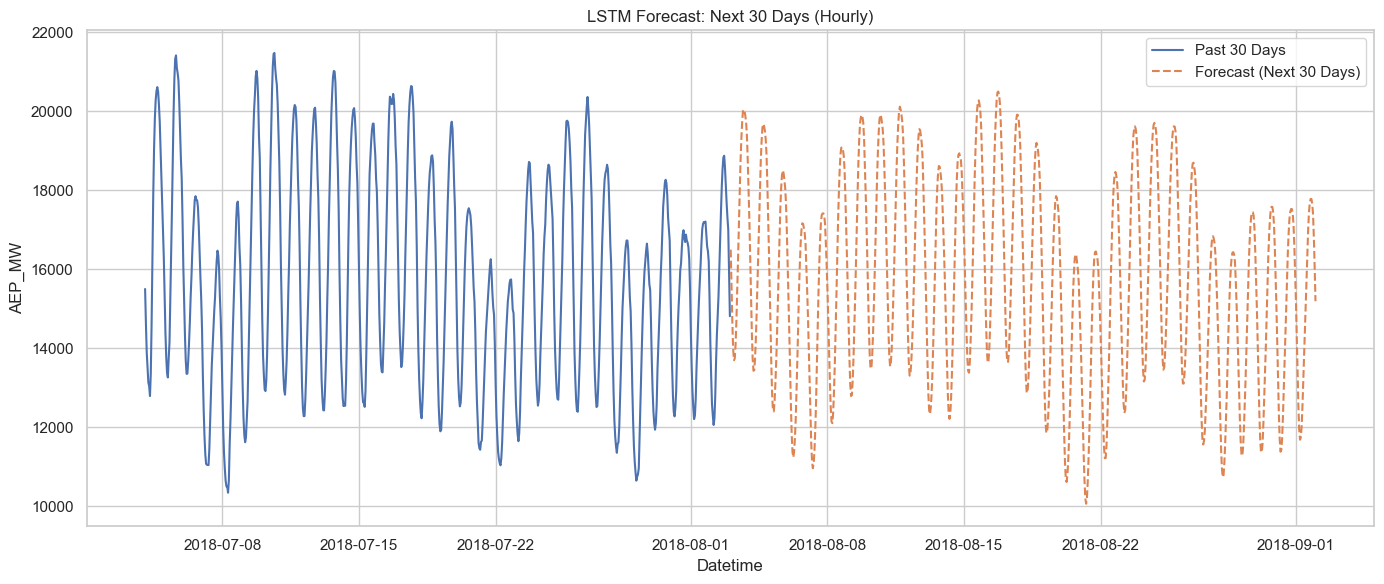

✅ Forecast saved to forecast_lstm_30days.csv


In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Load and Prepare Data
# -------------------------------
df = pd.read_csv("AEP_hourly_new_features.csv", parse_dates=['Datetime'])
df = df.sort_values("Datetime")
df = df.set_index('Datetime').resample('h').mean().interpolate()  # Use 'h' to avoid warning

# Normalize AEP_MW
scaler = MinMaxScaler()
df['AEP_scaled'] = scaler.fit_transform(df[['AEP_MW']])

# -------------------------------
# Step 2: Create Sequences
# -------------------------------
def create_sequences(data, input_len, output_len):
    X, y = [], []
    for i in range(len(data) - input_len - output_len):
        X.append(data[i:i+input_len])
        y.append(data[i+input_len:i+input_len+output_len])
    return np.array(X), np.array(y)

input_len = 720   # Past 30 days
output_len = 720  # Forecast 30 days

series = df['AEP_scaled'].values
X, y = create_sequences(series, input_len, output_len)

# Train-test split
X_train, y_train = X[:-1], y[:-1]
X_test, y_test = X[-1:], y[-1:]

# -------------------------------
# Step 3: Dataset and DataLoader
# -------------------------------
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 64
train_dataset = TimeSeriesDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------------
# Step 4: Define LSTM Model
# -------------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=720):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # only use last output step
        out = self.linear(out)
        return out

# -------------------------------
# Step 5: Train the Model
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel().to(device)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.6f}")

# -------------------------------
# Step 6: Forecast
# -------------------------------
model.eval()
with torch.no_grad():
    X_input = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1).to(device)
    forecast_scaled = model(X_input).cpu().numpy().flatten()

forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# -------------------------------
# Step 7: Plot Results
# -------------------------------
last_datetime = df.index[-1]
forecast_dates = pd.date_range(start=last_datetime + pd.Timedelta(hours=1), periods=720, freq='h')

plt.figure(figsize=(14, 6))
plt.plot(df.index[-input_len:], df['AEP_MW'].values[-input_len:], label="Past 30 Days")
plt.plot(forecast_dates, forecast, label="Forecast (Next 30 Days)", linestyle='--')
plt.xlabel("Datetime")
plt.ylabel("AEP_MW")
plt.title("LSTM Forecast: Next 30 Days (Hourly)")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Step 8: Save to CSV
# -------------------------------
forecast_df = pd.DataFrame({
    'Datetime': forecast_dates,
    'Forecasted_AEP_MW': forecast
})
forecast_df.to_csv("forecast_lstm_30days.csv", index=False)
print("✅ Forecast saved to forecast_lstm_30days.csv")

### Multi input features to forecast power consumption for next 30 days

Epoch 1/50, Loss: 0.015384
Epoch 2/50, Loss: 0.008950
Epoch 3/50, Loss: 0.008127
Epoch 4/50, Loss: 0.007839
Epoch 5/50, Loss: 0.007603
Epoch 6/50, Loss: 0.007538
Epoch 7/50, Loss: 0.007488
Epoch 8/50, Loss: 0.007371
Epoch 9/50, Loss: 0.007514
Epoch 10/50, Loss: 0.007424
Epoch 11/50, Loss: 0.007239
Epoch 12/50, Loss: 0.006782
Epoch 13/50, Loss: 0.006188
Epoch 14/50, Loss: 0.005841
Epoch 15/50, Loss: 0.005460
Epoch 16/50, Loss: 0.005195
Epoch 17/50, Loss: 0.004939
Epoch 18/50, Loss: 0.004622
Epoch 19/50, Loss: 0.004433
Epoch 20/50, Loss: 0.004235
Epoch 21/50, Loss: 0.003897
Epoch 22/50, Loss: 0.003588
Epoch 23/50, Loss: 0.003224
Epoch 24/50, Loss: 0.002879
Epoch 25/50, Loss: 0.002676
Epoch 26/50, Loss: 0.002524
Epoch 27/50, Loss: 0.002407
Epoch 28/50, Loss: 0.002384
Epoch 29/50, Loss: 0.002255
Epoch 30/50, Loss: 0.002199
Epoch 31/50, Loss: 0.002130
Epoch 32/50, Loss: 0.002056
Epoch 33/50, Loss: 0.002177
Epoch 34/50, Loss: 0.001933
Epoch 35/50, Loss: 0.001886
Epoch 36/50, Loss: 0.001844
E

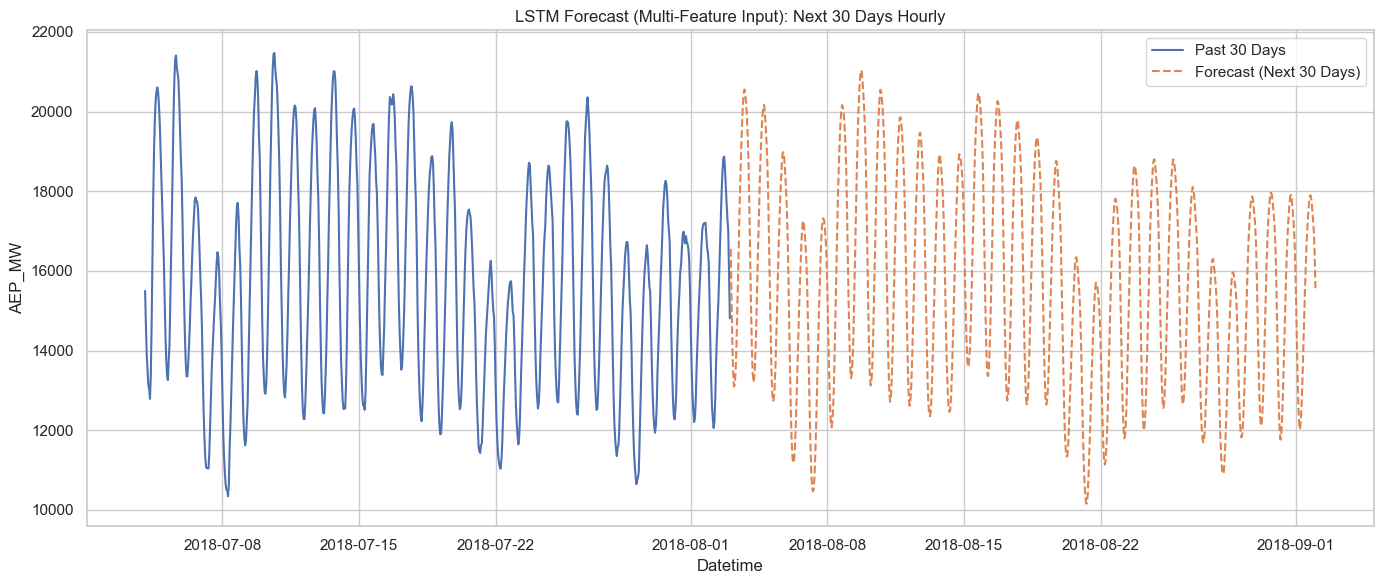

✅ Saved: forecast_lstm_multifeature_30days.csv


In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Load and Prepare Data
# -------------------------------
df = pd.read_csv("AEP_hourly_new_features.csv", parse_dates=['Datetime'])
df = df.sort_values("Datetime")
df = df.set_index('Datetime').resample('h').mean().interpolate()

# Add time-based features
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['DayOfMonth'] = df.index.day
df['Month'] = df.index.month
df['Weekend'] = (df['DayOfWeek'] >= 5).astype(int)

# Normalize all features
feature_cols = ['AEP_MW', 'Hour', 'DayOfWeek', 'DayOfMonth', 'Month', 'Weekend']
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[feature_cols]), columns=feature_cols, index=df.index)

# -------------------------------
# Step 2: Create Sequences
# -------------------------------
def create_sequences(data, target_col, input_len, output_len):
    X, y = [], []
    for i in range(len(data) - input_len - output_len):
        X.append(data[i:i+input_len].values)
        y.append(data[i+input_len:i+input_len+output_len][target_col].values)
    return np.array(X), np.array(y)

input_len = 720
output_len = 720
X, y = create_sequences(df_scaled, target_col='AEP_MW', input_len=input_len, output_len=output_len)

X_train, y_train = X[:-1], y[:-1]
X_test, y_test = X[-1:], y[-1:]

# -------------------------------
# Step 3: Dataset and DataLoader
# -------------------------------
class MultiFeatureDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)  # shape: (N, input_len, features)
        self.y = torch.tensor(y, dtype=torch.float32)  # shape: (N, output_len)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 64
train_dataset = MultiFeatureDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# -------------------------------
# Step 4: LSTM Model for Multi-Features
# -------------------------------
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=64, num_layers=2, output_len=720):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.linear(out)

input_size = X.shape[2]
model = LSTMModel(input_size=input_size).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# -------------------------------
# Step 5: Train the Model
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.6f}")

# -------------------------------
# Step 6: Forecast
# -------------------------------
model.eval()
with torch.no_grad():
    X_input = torch.tensor(X_test, dtype=torch.float32).to(device)
    forecast_scaled = model(X_input).cpu().numpy().flatten()

forecast = scaler.inverse_transform(
    np.concatenate([forecast_scaled.reshape(-1, 1),
                    np.zeros((forecast_scaled.shape[0], len(feature_cols) - 1))], axis=1)
)[:, 0]

# -------------------------------
# Step 7: Plot Results
# -------------------------------
last_datetime = df_scaled.index[-1]
forecast_dates = pd.date_range(start=last_datetime + pd.Timedelta(hours=1), periods=720, freq='h')

plt.figure(figsize=(14, 6))
plt.plot(df.index[-input_len:], df['AEP_MW'].values[-input_len:], label="Past 30 Days")
plt.plot(forecast_dates, forecast, label="Forecast (Next 30 Days)", linestyle='--')
plt.xlabel("Datetime")
plt.ylabel("AEP_MW")
plt.title("LSTM Forecast (Multi-Feature Input): Next 30 Days Hourly")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Step 8: Save Forecast
# -------------------------------
forecast_df = pd.DataFrame({
    'Datetime': forecast_dates,
    'Forecasted_AEP_MW': forecast
})
forecast_df.to_csv("forecast_lstm_multifeature_30days.csv", index=False)
print("✅ Saved: forecast_lstm_multifeature_30days.csv")